In [97]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [100]:
def kmeans(dataset, n_clusters, max_iter=10, random_state=None):
    #rng = np.random.default_rng(random_state)

    centroids = initialize_centroids(dataset, n_clusters)

    points = attibuate_points_to_centroids(dataset, centroids)

    # Perform k-means clustering
    for itera in range(max_iter):
        old_centroids = centroids
        centroids = update_centroids(dataset, points, n_clusters)
        new_points = attibuate_points_to_centroids(dataset, centroids)
        if np.all(new_points == points):
            break
        points = new_points

    return centroids, points

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))


def initialize_centroids(dataset, n_clusters, random_state=None):
    centro = np.random.choice(dataset.shape[0], n_clusters, replace=False)
    centroids = dataset[centro]
    return centroids

def attibuate_points_to_centroids(dataset, centroids):
    rows, cols = dataset.shape
    n_clusters = centroids.shape[0]
    points = np.zeros(rows, dtype=int)
    for i in range(rows):
        min_distance = np.inf
        for j in range(n_clusters):
            distance = euclidean_distance(dataset[i], centroids[j])
            if distance < min_distance:
                min_distance = distance
                points[i] = j
    return points

def update_centroids(dataset, points, n_clusters):
    rows = dataset.shape[0]
    centroids = np.zeros((n_clusters, rows // n_clusters))
    for i in range(n_clusters):
        cluster = dataset[points == i]
        if len(cluster) > 0:
            centroids[i] = np.mean(cluster, axis=0)
    return centroids


In [101]:
dataset = np.random.rand(10, 3)
dataset

array([[0.76416062, 0.49663207, 0.52870902],
       [0.56589246, 0.93741225, 0.40736911],
       [0.42997771, 0.12461927, 0.23443441],
       [0.79521398, 0.46641186, 0.31275612],
       [0.87107813, 0.21820127, 0.22517548],
       [0.53907246, 0.1619672 , 0.84770008],
       [0.43844749, 0.35810615, 0.820568  ],
       [0.0297885 , 0.41988804, 0.59923397],
       [0.70115391, 0.78967767, 0.54066681],
       [0.29225677, 0.58867269, 0.41636343]])

In [109]:
model = kmeans(dataset, n_clusters = 3, max_iter=10)

In [110]:
model

(array([[0.48875997, 0.26003668, 0.83413404],
        [0.39727291, 0.68391266, 0.49090833],
        [0.71510761, 0.32646612, 0.32526876]]),
 array([2, 1, 2, 2, 2, 0, 0, 1, 1, 1]))

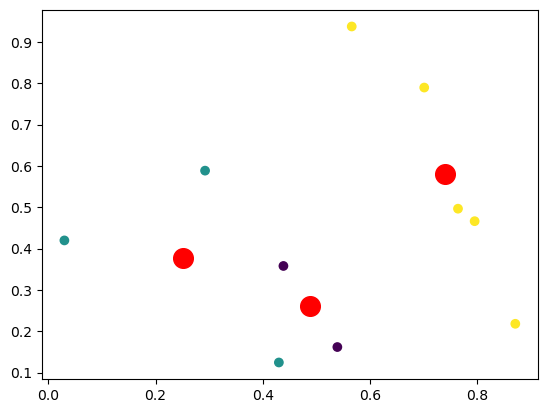

In [112]:
#dataset = np.random.rand(10, 3)
#dataset = np.array(random_array)
centroids, points = kmeans(dataset, n_clusters = 3, max_iter=10)

# Print les points et centroids
#print("Cluster points:", points)
#print("Cluster centroids:", centroids)

# afficher les points et les centroids
plt.scatter(dataset[:, 0], dataset[:, 1], c=points, cmap="viridis")
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", s=200)
plt.show()